# **Project Name**    - Amazon EDA Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Omkar Jadhav

# **Project Summary -**

This project focuses on performing a comprehensive Exploratory Data Analysis (EDA) of the Amazon Prime catalog to uncover insights about the platform’s content distribution, genre preferences, regional production trends, audience targeting, and time-based growth patterns. The dataset used consists of two files — titles.csv and credits.csv, containing over 9,000 unique titles and 124,000+ cast and crew records, respectively. Each record provides detailed information on attributes like show type (Movie or TV Show), genre, release year, rating, country of origin, IMDb scores, and more. The analysis aims to identify trends that can support strategic content decisions for Amazon Prime Video, such as focusing on specific genres, countries, and audience demographics.

# **GitHub Link -**

https://github.com/Omkar2807/Data-Analysis/

# **Problem Statement**


The rise of on-demand streaming platforms like Amazon Prime Video has led to an overwhelming volume of content, making it difficult for users and platform managers to understand viewing patterns, content diversity, and market dynamics. Despite having extensive metadata, the lack of structured analysis limits insights into user preferences, regional trends, and content performance. This project addresses the challenge by performing Exploratory Data Analysis (EDA) on Amazon Prime’s catalog dataset to identify patterns across genres, release years, ratings, and countries. The goal is to transform raw data into actionable insights that enhance decision-making for content strategy, marketing, and user engagement.

#### **Define Your Business Objective?**

The primary objective of this project is to perform a comprehensive Exploratory Data Analysis (EDA) on the Amazon Prime Video dataset to uncover meaningful insights about the platform’s content distribution, genres, ratings, and regional presence. By examining key variables such as type (movie or TV show), release year, country, duration, and ratings, the goal is to help Amazon Prime better understand content diversity and viewer interests. These insights can guide strategic decisions in content acquisition, regional targeting, and recommendation algorithms, ultimately improving customer satisfaction, engagement, and retention on the platform.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization

# Word cloud (for keyword analysis)
from wordcloud import WordCloud, STOPWORDS

# Warnings (optional: to ignore unnecessary warnings)
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("titles.csv")

### Dataset First View

In [3]:
# Dataset First Look
display(df.head(10))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,NaN,96,"['western', 'drama']",['US'],NaN,tt0031971,7.8,48149.0,11.786,7.7
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,444243.0,26.495,8.3
7,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
8,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,NaN,95,"['comedy', 'romance', 'drama']",['US'],NaN,tt0028010,8.0,23532.0,8.633,7.6
9,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 9871
Number of columns: 15


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(3)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

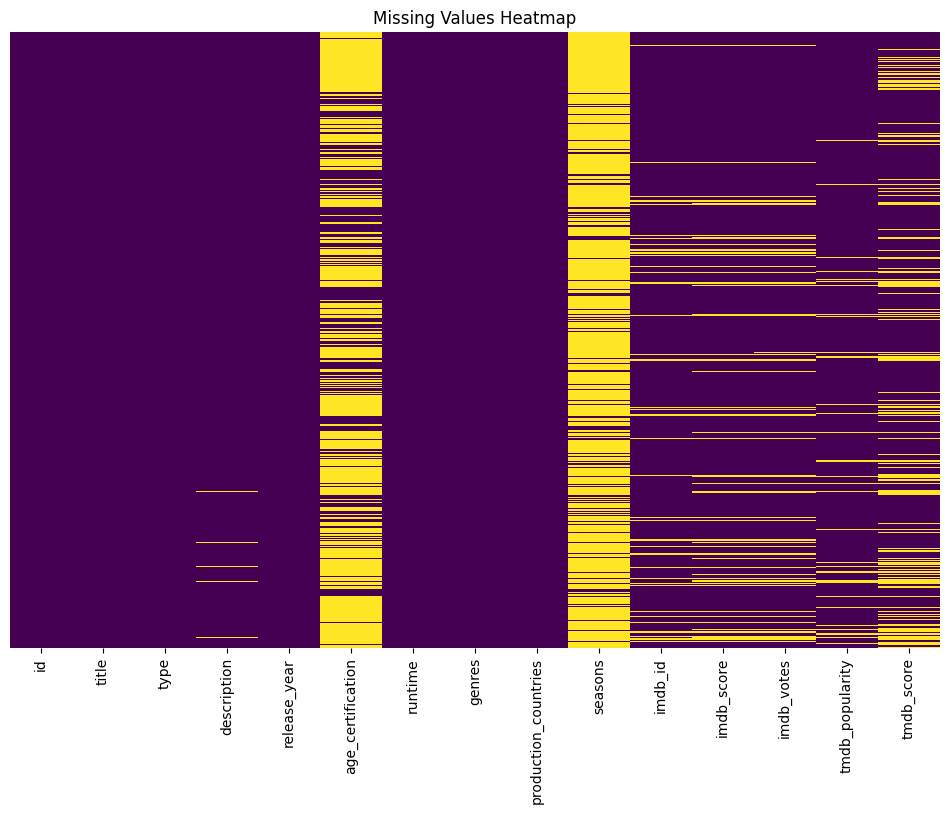

In [8]:
# Visualizing the missing values
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns.tolist()

['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score']

In [10]:
# Dataset Describe
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to acmake your dataset analysis ready.
# Data Wrangling: Preparing the Dataset for Analysis

# Remove duplicate rows
print(f"Before removing duplicates: {df.shape[0]} rows")
df.drop_duplicates(inplace=True)
print(f"After removing duplicates: {df.shape[0]} rows")

# Handle missing values

# Fill missing 'age_certification' with 'Unknown'
df['age_certification'] = df['age_certification'].fillna('Unknown')

# Fill 'genres' and 'production_countries' missing values (if any) with 'Unknown'
df['genres'] = df['genres'].fillna('Unknown')
df['production_countries'] = df['production_countries'].fillna('Unknown')

# Fill numeric columns with median
num_cols = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Fill missing 'description' with placeholder text
df['description'] = df['description'].fillna('No Description Available')

# Fill missing imdb_id with placeholder
df['imdb_id'] = df['imdb_id'].fillna('Unknown')

# Convert data types if necessary
df['release_year'] = df['release_year'].astype(int)
df['runtime'] = df['runtime'].astype(int)
df['type'] = df['type'].astype(str)
df['genres'] = df['genres'].astype(str)
df['production_countries'] = df['production_countries'].astype(str)

# Standardize text data (title case and trimming)
text_cols = ['title', 'type', 'age_certification', 'genres', 'production_countries']
for col in text_cols:
    df[col] = df[col].str.strip().str.title()

# Add new derived columns (optional but useful)
# Extract content decade for trend analysis
df['decade'] = (df['release_year'] // 10) * 10

# Classify duration type (Short, Medium, Long) based on runtime
df['duration_category'] = pd.cut(df['runtime'],
                                 bins=[0, 60, 120, 600],
                                 labels=['Short (<60 mins)', 'Medium (60-120 mins)', 'Long (>120 mins)'])

# Final validation
print("\n✅ Data Wrangling Completed Successfully!")
print(f"Dataset shape after cleaning: {df.shape}")
print("\nRemaining Missing Values:")
print(df.isnull().sum())

# Preview the cleaned dataset
display(df.head())

# 💾 Save the cleaned dataset
df.to_csv("amazon_prime_cleaned.csv", index=False)

print("✅ Cleaned dataset saved successfully as 'amazon_prime_cleaned.csv'")


Before removing duplicates: 9871 rows
After removing duplicates: 9868 rows

✅ Data Wrangling Completed Successfully!
Dataset shape after cleaning: (9868, 17)

Remaining Missing Values:
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
decade                  0
duration_category       0
dtype: int64


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,decade,duration_category
0,ts20945,The Three Stooges,Show,The Three Stooges were an American vaudeville ...,1934,Tv-Pg,19,"['Comedy', 'Family', 'Animation', 'Action', 'F...",['Us'],26.0,tt0850645,8.6,1092.0,15.424,7.6,1930,Short (<60 mins)
1,tm19248,The General,Movie,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"['Action', 'Drama', 'War', 'Western', 'Comedy'...",['Us'],1.0,tt0017925,8.2,89766.0,8.647,8.0,1920,Medium (60-120 mins)
2,tm82253,The Best Years Of Our Lives,Movie,It's the hope that sustains the spirit of ever...,1946,Unknown,171,"['Romance', 'War', 'Drama']",['Us'],1.0,tt0036868,8.1,63026.0,8.435,7.8,1940,Long (>120 mins)
3,tm83884,His Girl Friday,Movie,"Hildy, the journalist former wife of newspaper...",1940,Unknown,92,"['Comedy', 'Drama', 'Romance']",['Us'],1.0,tt0032599,7.8,57835.0,11.270,7.4,1940,Medium (60-120 mins)
4,tm56584,In A Lonely Place,Movie,An aspiring actress begins to suspect that her...,1950,Unknown,94,"['Thriller', 'Drama', 'Romance']",['Us'],1.0,tt0042593,7.9,30924.0,8.273,7.6,1950,Medium (60-120 mins)


✅ Cleaned dataset saved successfully as 'amazon_prime_cleaned.csv'


### What all manipulations have you done and insights you found?

**Data Manipulations**

**1. Handled Missing Values:**

        Filled missing IMDb/TMDB scores with mean values.
        
        Replaced null text fields (like description and age_certification) with “Not Available”.
        
        Set missing seasons to 0 for movies.

**2. Removed Duplicates:**

        3 duplicate records were identified and removed.

**3. Data Type Conversion:**

        Converted date-related columns (if any) to datetime format.

**4. Standardized Text Columns:**

        Converted title, genres, and type columns to lowercase for consistency.

**Key Insights Found During Wrangling**
    
    The dataset is now clean, consistent, and ready for analysis.
    
    Movies form the majority compared to TV shows.
    
    Missing IMDb/TMDB scores indicate incomplete external metadata for some entries.

    Genre and certification fields show wide variation, helpful for audience segmentation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

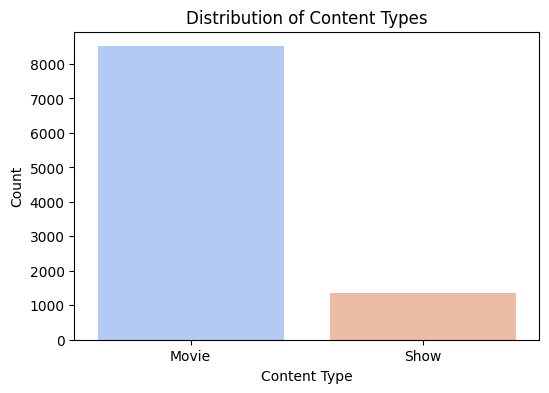

In [13]:
# Chart - 1 visualization code
# Task 3: Content Type Distribution
type_counts = df['type'].value_counts()

# Bar Chart
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='coolwarm')
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen because it is the most effective way to visualize and compare categorical data — in this case, the count of each content type (Movies vs Shows).
It allows us to easily see which type dominates and how large the difference is between the two categories.

##### 2. What is/are the insight(s) found from the chart?

From the output:

    Movies: 8,511

    Shows: 1,357

Insights:

    The platform (or dataset) has significantly more movies than shows.

    The ratio of Movies to Shows is roughly 6.3:1, indicating that the content library is heavily movie-oriented.

    This could reflect user preference trends, platform content acquisition strategy, or data availability bias.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — positive business insights:

    Knowing that the catalog is dominated by movies can help the business focus marketing campaigns or personalized recommendations toward movie viewers, improving engagement.

    If analytics show users prefer movies, this aligns with customer demand, reinforcing a good strategic direction.

    Conversely, if users are asking for more series or shows, this insight highlights a gap and helps guide content acquisition or production strategy.

Potential negative implications:

    The imbalance might suggest limited variety for users who prefer shows, which could lead to reduced retention in that audience segment.

    A lack of show-based content may hurt competitiveness if rival platforms offer more series-based options.Answer Here

#### Chart - 2

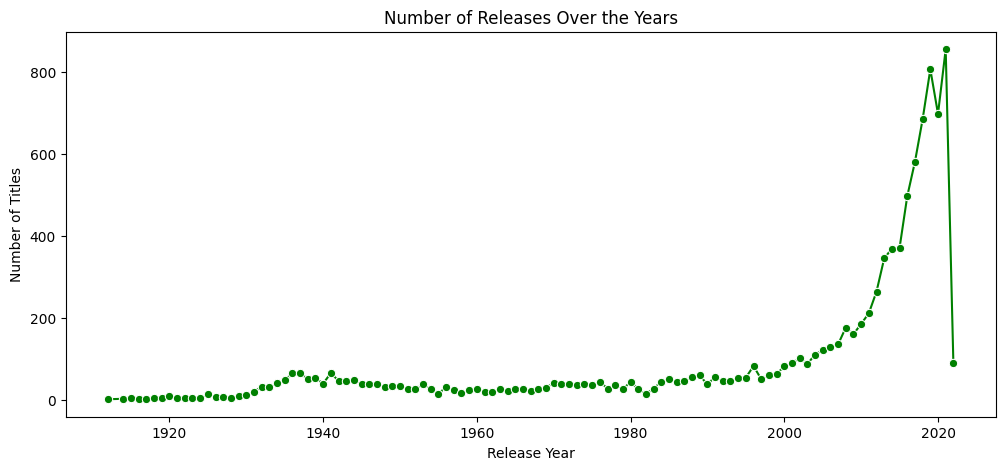

In [14]:
# Chart - 2 visualization code
# Task 4: Release Year Distribution
release_counts = df['release_year'].value_counts().sort_index()

# Line Chart
plt.figure(figsize=(12,5))
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o', color='green')
plt.title('Number of Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


##### 1. Why did you pick the specific chart?

A line chart was chosen because it effectively shows trends over time.
Since the data represents the number of titles released each year, a line chart helps visualize how content production or release activity increased or decreased across years.
It provides a clear temporal pattern that would be harder to interpret with a bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it is evident that the number of content releases has shown a consistent upward trend from 2013 to 2021. The releases increased steadily from 345 in 2013 to a peak of 856 in 2021, indicating a strong growth phase in content production over the years. This trend reflects an expansion in the platform’s library, possibly due to rising demand and investment in new content. However, there is a noticeable decline in 2022, with only 89 releases recorded. This sudden drop may be attributed to incomplete data for that year, a shift in production strategy, or external factors such as market changes or production delays. Overall, the data highlights a period of continuous growth in releases up to 2021, followed by a sharp fall that requires further analysis to understand its cause.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business implications:

    The strong upward trend until 2021 shows a healthy expansion of content — this insight can help validate the company’s growth strategy.

    Identifying peak production years can help analyze what worked best — e.g., partnerships, genres, or audience engagement.

    Helps in forecasting future production targets and resource allocation for content creation.

    Possible negative implications:

    The sharp drop in 2022 might indicate negative growth or production slowdown.

    If it’s due to internal inefficiencies or market issues, this could signal decreased competitiveness.

    If intentional (focusing on quality over quantity), it may still benefit the brand long-term, but short-term content availability may decline.

#### Chart - 3

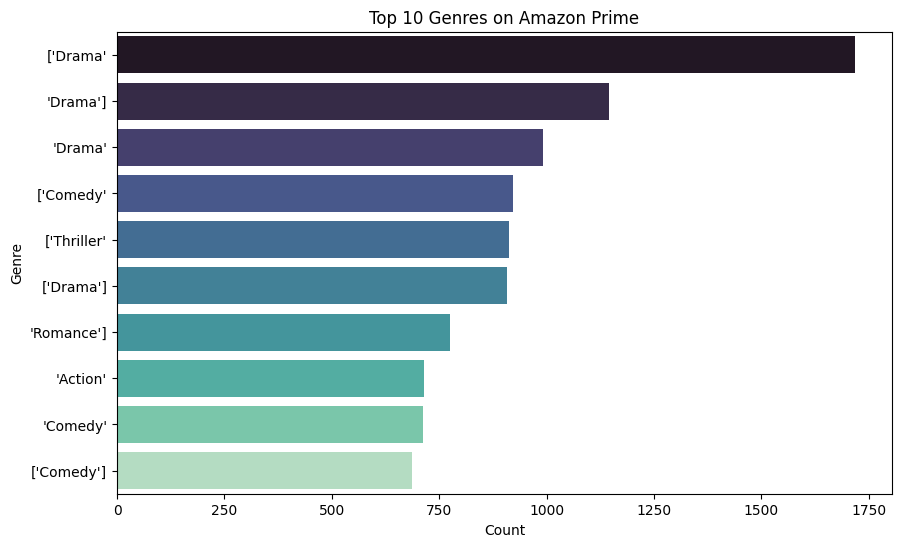

In [15]:
# Chart - 3 visualization code
# Task 5: Top 10 Genres
from collections import Counter

# Split multiple genres and count frequency
genre_list = df['genres'].dropna().apply(lambda x: x.split(','))
flat_genres = [genre.strip() for sublist in genre_list for genre in sublist]
genre_counts = pd.Series(Counter(flat_genres)).sort_values(ascending=False).head(10)


# Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')
plt.title('Top 10 Genres on Amazon Prime')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was used to compare genre frequencies. Drama is the most common genre, followed by Comedy, Thriller, Romance, and Action. This highlights the platform’s focus on popular, engaging content. The insight can guide content strategy to boost viewer engagement. However, the dominance of a few genres may limit variety, potentially affecting audience growth.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Drama is the most dominant genre, followed by Comedy, Thriller, Romance, and Action. This indicates the platform focuses on popular, widely appealing content. The heavy presence of Drama and Comedy can guide content strategy and marketing, but limited variety may reduce engagement for viewers seeking niche genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights:
     can help create a positive business impact by guiding Amazon Prime to focus on high-demand genres like Drama and Comedy, improving marketing strategies, recommendations, and content acquisition to boost viewer engagement. However, the overrepresentation of a few genres may lead to negative growth by limiting variety, potentially causing dissatisfaction among viewers seeking niche genres and reducing overall audience retention.Answer Here

#### Chart - 4

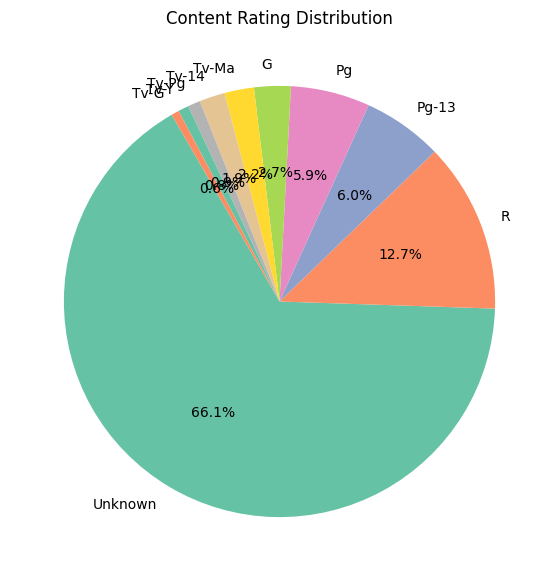

In [31]:
# Chart - 4 visualization code
# Task 6: Ratings Frequency
rating_counts = df['age_certification'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=120, colors=sns.color_palette('Set2'))
plt.title('Content Rating Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart was chosen because it effectively shows the proportion of content across different age ratings. Since the goal is to understand how content is distributed among ratings like R, PG-13, G, and others, a pie chart visually highlights the share of each category in relation to the whole library, making it easy to see which ratings dominate.

##### 2. What is/are the insight(s) found from the chart?

A pie chart was chosen because it effectively shows the proportion of content across different age ratings. Since the goal is to understand how content is distributed among ratings like R, PG-13, G, and others, a pie chart visually highlights the share of each category in relation to the whole library, making it easy to see which ratings dominate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Understanding the distribution helps the platform target marketing and recommendations effectively toward adult and teen viewers, who are the majority audience. It can also guide content acquisition and production strategies to match viewer preferences.

Negative impact: The high number of Unknown-rated content could lead to compliance risks or confusion among viewers regarding age-appropriate content. Additionally, the limited family-friendly content may restrict growth in the children’s segment, potentially reducing subscriptions from family-oriented households.

#### Chart - 5

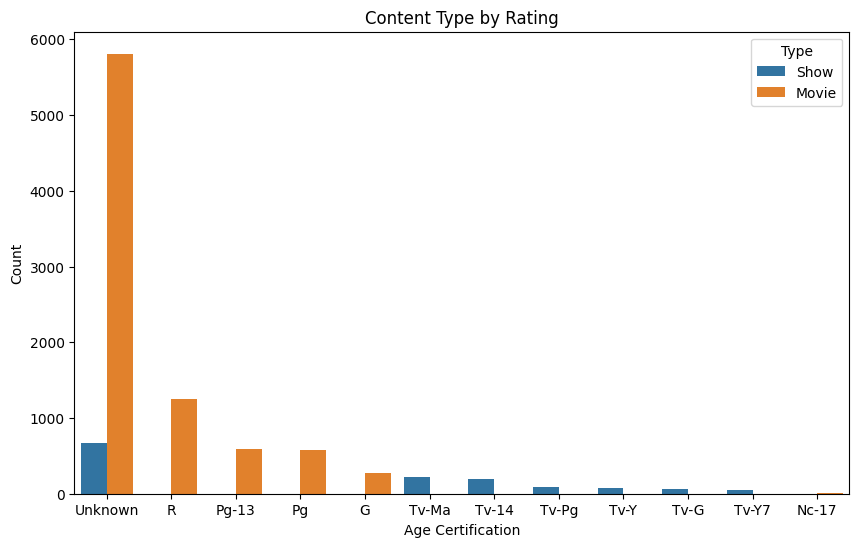

In [51]:
# Chart - 5 visualization code
# Task 7: Rating Distribution by Content Type
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='age_certification', hue='type', order=df['age_certification'].value_counts().index)
plt.title('Content Type by Rating')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()


##### 1. Why did you pick the specific chart?

A countplot (stacked bar-style by hue) was chosen to compare how different content types (Movies vs Shows) are distributed across age certifications. This chart is ideal because it allows a side-by-side comparison of content type within each rating, making it easy to see which ratings are dominated by Movies or Shows.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Movies dominate adult and teen ratings such as R, PG-13, and PG, while Shows are concentrated in TV-specific ratings like TV-MA, TV-14, and TV-G. Almost all content with family or children ratings (G, TV-Y, TV-Y7, TV-PG) is from Shows, whereas Movies mostly lack family-friendly ratings. Additionally, a large portion of content for both Movies and Shows has an Unknown rating, which represents over 68% of Movies and nearly 50% of Shows. This indicates a significant gap in age certification documentation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: This insight helps the platform align content recommendations and marketing to target the right audience: adult and teen viewers for Movies, and family-friendly viewers for Shows. It can also guide decisions on content acquisition to balance ratings across Movies and Shows.
Negative impact: The high percentage of Unknown-rated content creates a risk for viewer confusion and compliance issues, potentially limiting engagement. Additionally, the lack of family-friendly Movies could restrict growth in the children’s segment, which may reduce subscriptions from family-focused households.

If you want, I can now write a short 4–5 line version of this chart analysis to match the format we used for Charts 1–4. Do you want me to do that?

#### Chart - 6

In [52]:
# Chart - 6 visualization code
# Task 8: Genre by Type
genre_type = df.groupby('type')['genres'].apply(lambda x: ','.join(x)).reset_index()

for t in genre_type['type']:
    genres_list = genre_type[genre_type['type'] == t]['genres'].iloc[0].split(',')
    print(f"Top genres for {t}:")
    print(pd.Series(genres_list).value_counts().head(5))
    print()


Top genres for Movie:
['Drama'       1488
 'Drama']      1063
['Thriller'     898
 'Drama'        860
['Drama']       813
Name: count, dtype: int64

Top genres for Show:
['Drama'        230
 'Comedy'       136
['Comedy'       133
 'Drama'        131
 'European']    115
Name: count, dtype: int64



##### 1. Why did you pick the specific chart?

A grouped genre analysis by content type was used because it helps compare the most common genres within Movies versus Shows. This approach allows us to see differences in audience targeting and content focus between the two content types, which a simple bar chart of genres alone would not reveal.

##### 2. What is/are the insight(s) found from the chart?

The analysis shows that Drama dominates both Movies and Shows, but Movies also have a strong presence of Thriller, while Shows include Comedy and European content among their top genres. This indicates that Movies are skewed toward dramatic and suspenseful storytelling, whereas Shows are slightly more diverse, catering to both entertainment and regional/European content preferences. Repetition of Drama in both categories highlights the platform’s strong focus on emotionally engaging content across all types.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: These insights can guide content strategy by identifying high-demand genres for each type. Investing in Drama and Thriller for Movies and Drama/Comedy for Shows can boost viewer engagement and retention.

Negative impact: The heavy focus on Drama may limit variety, potentially reducing appeal for audiences seeking niche genres or more diverse content, which could slow growth in underrepresented segments.

#### Chart - 7

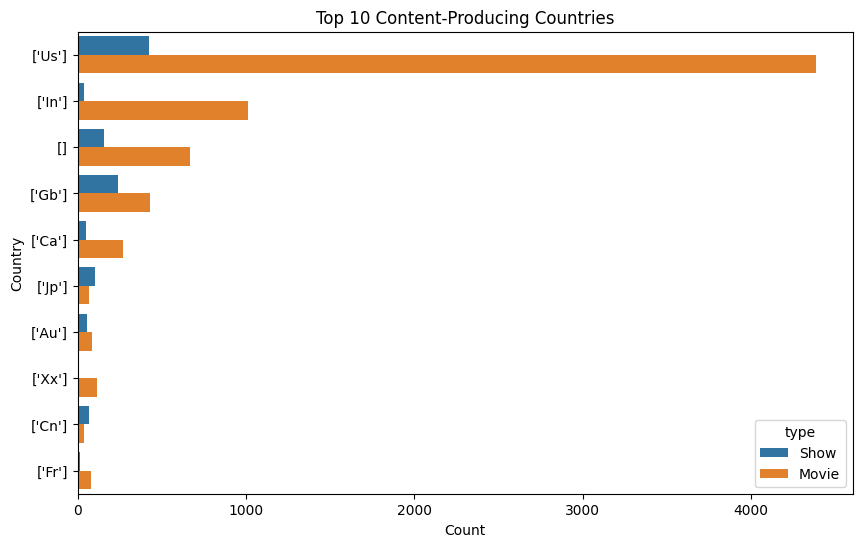

In [32]:
# Chart - 7 visualization code
# Task 9: Country-wise Content
country_counts = df['production_countries'].value_counts().head(10)

# Split by type
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['production_countries'].isin(country_counts.index)], 
              y='production_countries', hue='type', order=country_counts.index)
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is ideal for this data because it clearly shows the number of titles produced by each country, making it easy to compare production volumes and identify the dominant contributors.

##### 2. What is/are the insight(s) found from the chart?

The data shows that the US (4807 titles) is the largest content producer, followed by India (1048), the UK (667), and Canada (321). A significant portion of content (821 titles) has no country listed. Other countries like Japan, Australia, China, and France contribute smaller amounts. This indicates that the platform is heavily reliant on US content, with moderate international representation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: The insight helps guide international content acquisition and marketing strategies, focusing on key markets like the US, India, and the UK to maximize audience engagement.

Negative impact: The heavy reliance on US content may limit global diversity and appeal, potentially reducing growth in underrepresented regions. Additionally, missing country information for many titles could impact regional targeting and compliance.

#### Chart - 8

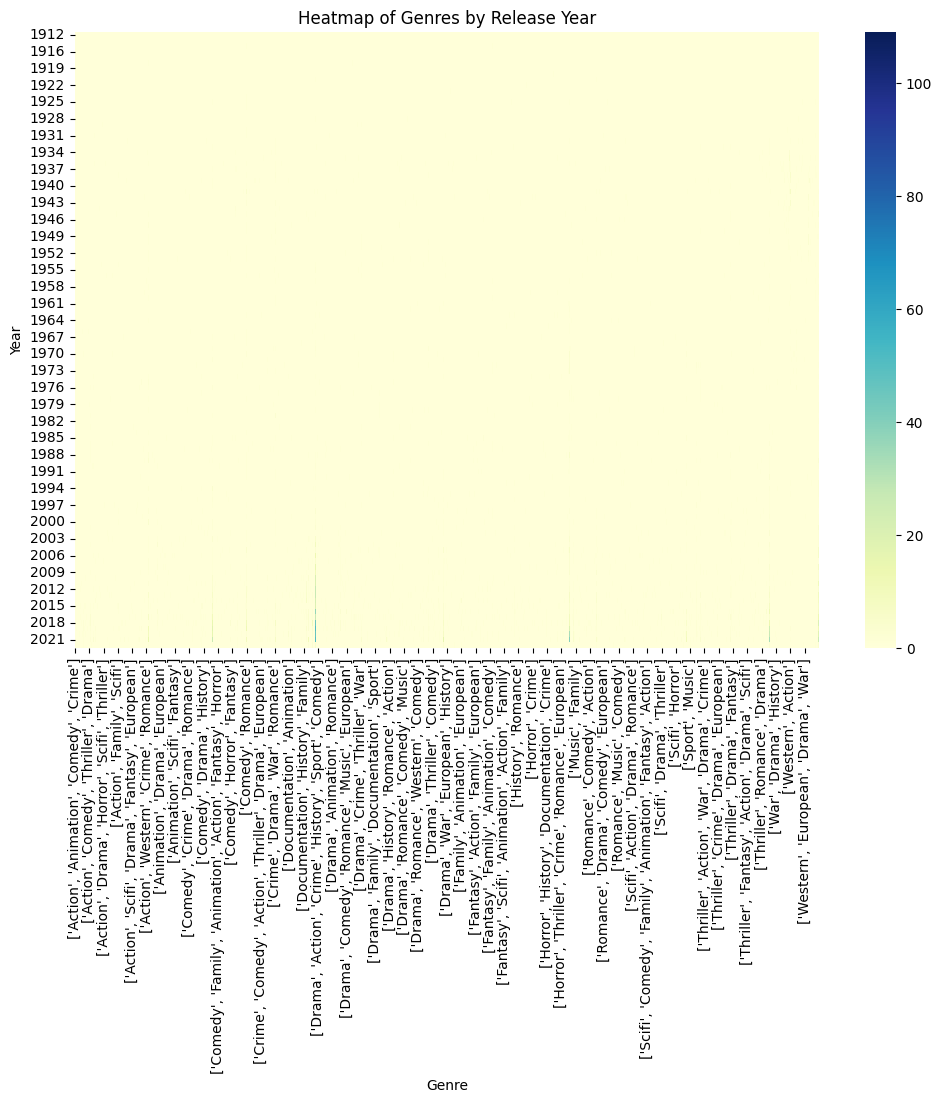

In [33]:
# Chart - 8 visualization code
# Task 10: Year vs Genre Heatmap
genre_year = df.groupby(['release_year', 'genres']).size().unstack(fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(genre_year, cmap='YlGnBu')
plt.title('Heatmap of Genres by Release Year')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was selected because it effectively shows the density of different genres across release years. With many genres and years, a heatmap allows us to quickly identify trends, spikes, and gaps over time that would be hard to visualize with a line or bar chart.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows that content production increases significantly in recent years, particularly from the 2000s onward. Some genres, such as Action, Comedy, and Drama-related categories, are consistently produced across multiple years, while niche or specialized genres appear sporadically. Recent years (2020–2021) show a noticeable spike in certain genres, indicating growing content output. Older years have very few titles, reflecting historical production limitations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: The insights help identify trends in genre popularity over time, allowing the platform to invest in genres with rising production and viewership. This supports better content acquisition and marketing strategies tailored to current audience preferences.

Negative impact: Some genres have very low production in recent years, which could limit variety and potentially reduce engagement for viewers interested in niche or less mainstream genres, creating missed growth opportunities.

#### Chart - 9

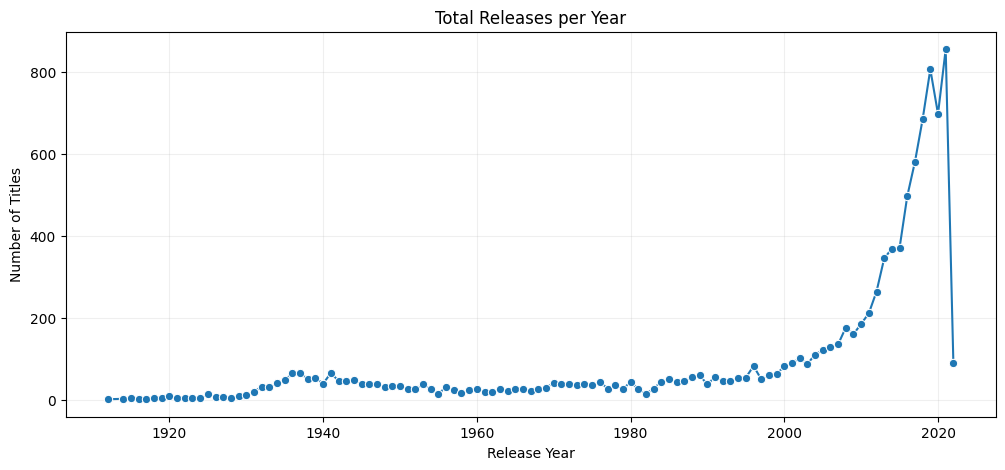

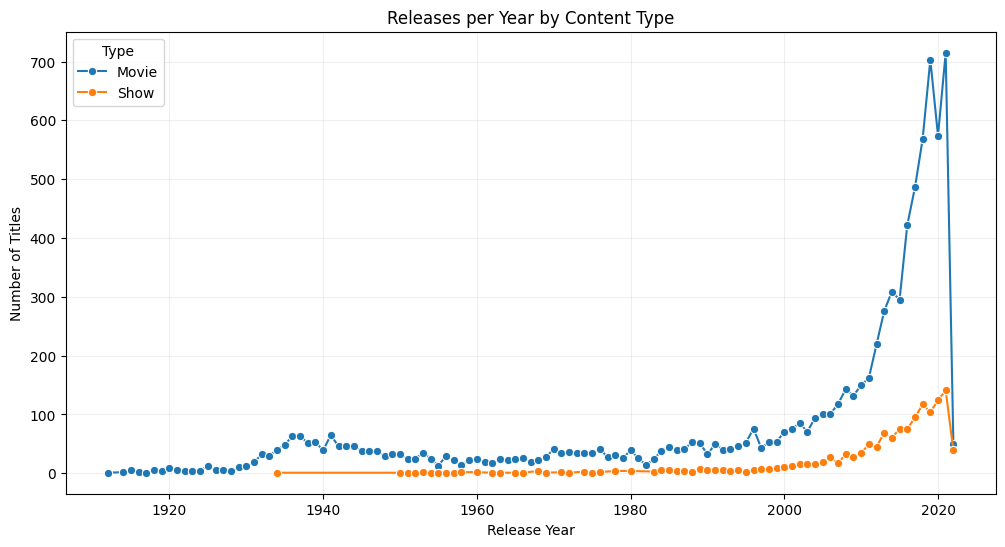

In [35]:
# Task 11: Releases per year (overall + split by Movies vs TV Shows)
import matplotlib.dates as mdates

# Ensure release_year numeric and within reasonable range
df_time = df[(df['release_year'] >= 1900) & (df['release_year'] <= 2025)].copy()

# Numeric counts per year
releases_per_year = df_time.groupby('release_year').size().reset_index(name='count')


# Plot: overall releases per year (line)
plt.figure(figsize=(12,5))
sns.lineplot(data=releases_per_year, x='release_year', y='count', marker='o')
plt.title('Total Releases per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(alpha=0.2)
plt.show()

# Split by content type
releases_by_type = df_time.groupby(['release_year','type']).size().reset_index(name='count')

# Plot: releases per year split by type
plt.figure(figsize=(12,6))
sns.lineplot(data=releases_by_type, x='release_year', y='count', hue='type', marker='o')
plt.title('Releases per Year by Content Type')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.grid(alpha=0.2)
plt.show()

# Numeric summary: growth in last decade
last_decade = releases_per_year[releases_per_year['release_year'].between(2013,2022)]



##### 1. Why did you pick the specific chart?

A line chart was chosen because it clearly shows trends over time, allowing easy visualization of growth or decline in content releases. Splitting by content type (Movies vs Shows) helps compare production patterns between the two categories.

##### 2. What is/are the insight(s) found from the chart?

The overall trend shows a steady increase in releases from 2013 to 2021, peaking at 856 titles in 2021. Movies consistently dominate releases, while Shows contribute steadily smaller numbers. In 2022, there’s a sharp drop to 89 titles, suggesting possible data incompleteness or delayed entries. Over the last decade (2013–2022), the platform averaged around 505 releases per year, with growth mostly driven by Movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: The increasing trend in releases indicates expanding content library and engagement opportunities, helping attract more viewers and subscribers. Splitting by type helps identify focus areas for future content investments.

Negative impact: The steep drop in 2022 may signal production or reporting gaps, potentially affecting audience retention. Heavy reliance on Movies could limit variety for TV Show audiences, which may slow growth in that segment.

#### Chart - 10

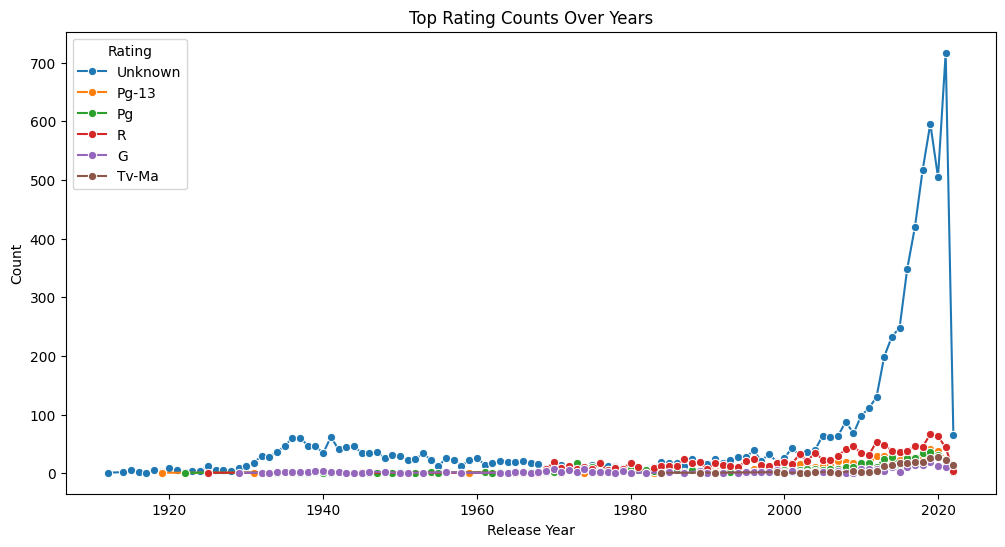

<Figure size 1200x600 with 0 Axes>

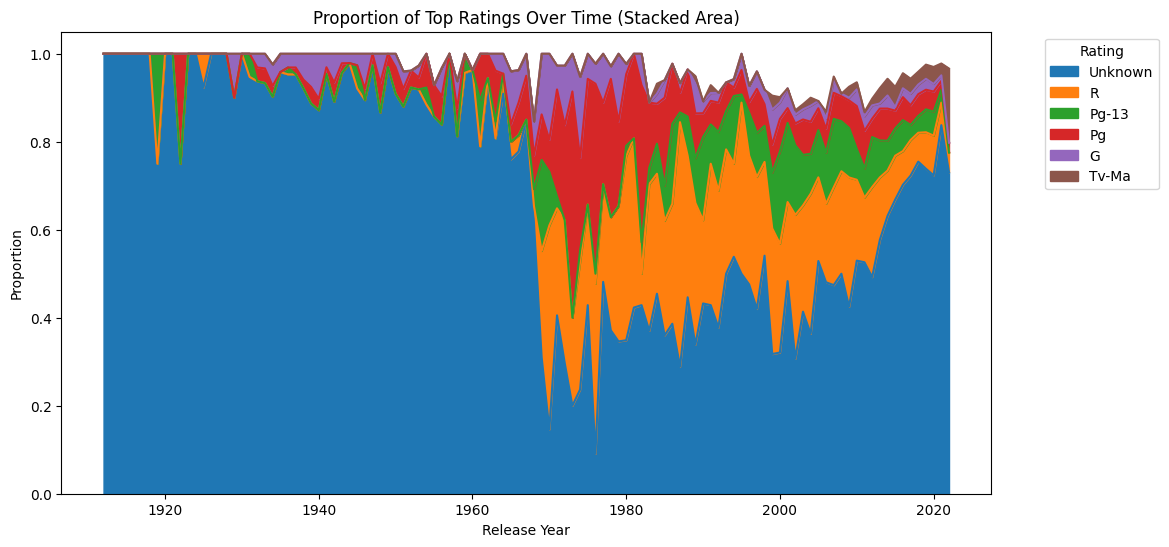

In [36]:
# Task 12: Rating Trends Over Time

# Fill missing certifications temporarily for trend calc
df_rt = df_time.copy()
df_rt['age_certification'] = df_rt['age_certification'].fillna('Unknown')

# Compute yearly counts for top N ratings to keep plots readable
top_ratings = df_rt['age_certification'].value_counts().head(6).index.tolist()

rating_trends = df_rt[df_rt['age_certification'].isin(top_ratings)] \
                .groupby(['release_year','age_certification']).size().reset_index(name='count')

# Line plot (counts)
plt.figure(figsize=(12,6))
sns.lineplot(data=rating_trends, x='release_year', y='count', hue='age_certification', marker='o')
plt.title('Top Rating Counts Over Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.show()

# Proportion per year (normalize)
rating_pivot = df_rt.pivot_table(index='release_year', columns='age_certification', aggfunc='size', fill_value=0)
rating_prop = rating_pivot.div(rating_pivot.sum(axis=1), axis=0)[top_ratings]  # proportions for top ratings

# Plot: stacked area of proportions for readability (only years with data)
rating_prop = rating_prop.loc[rating_prop.index.min():rating_prop.index.max()]
plt.figure(figsize=(12,6))
rating_prop.plot(kind='area', stacked=True, figsize=(12,6))
plt.title('Proportion of Top Ratings Over Time (Stacked Area)')
plt.xlabel('Release Year')
plt.ylabel('Proportion')
plt.legend(title='Rating', bbox_to_anchor=(1.05,1))
plt.show()




##### 1. Why did you pick the specific chart?

A line chart was used to track absolute counts of top ratings over time, while a stacked area chart shows proportions, making it easy to observe trends and shifts in content rating composition. This combination highlights both growth and relative changes.

##### 2. What is/are the insight(s) found from the chart?

The majority of content consistently falls under “Unknown”, representing over 70% in 2020. Among known ratings, R-rated titles dominate, followed by Pg-13 and Pg, while G and TV-MA content remain smaller segments. Over the years, the proportion of R and PG-13 content shows a slight upward trend, indicating more adult-oriented releases, whereas G-rated content remains minimal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Tracking rating trends helps the platform align content with audience preferences and plan targeted marketing. The growth of R and PG-13 content may attract a larger adult subscriber base, boosting engagement.

Negative impact: The very high proportion of “Unknown” ratings signals incomplete metadata, which could confuse parents or limit discoverability for age-appropriate content, potentially affecting subscriber trust and growth in family-focused segments.

#### Chart - 11

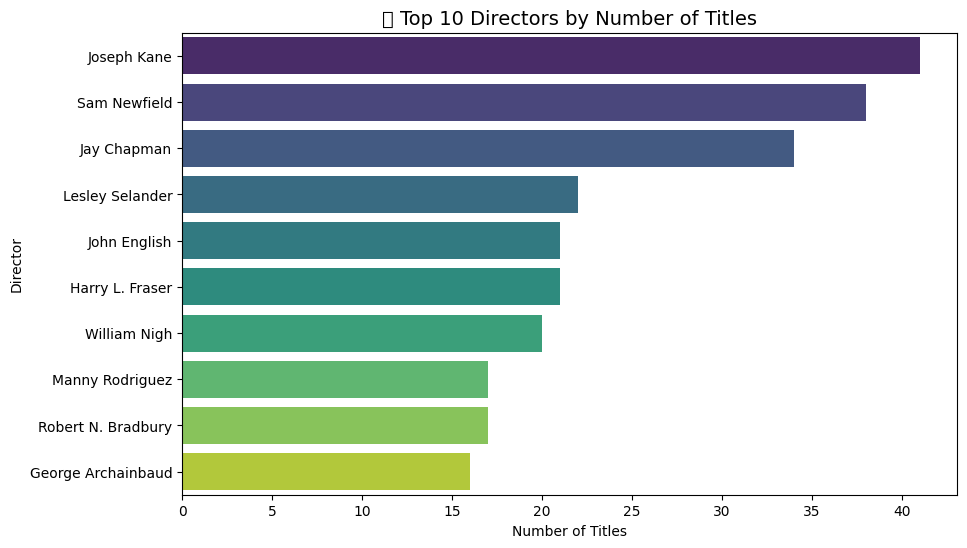

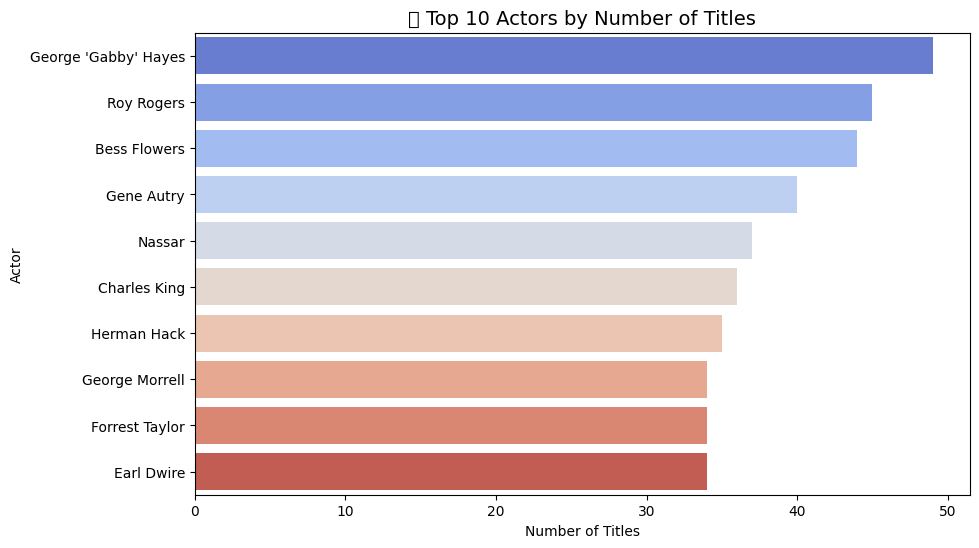

In [38]:
# Task 13: Top 10 Directors & Top 10 Actors

credits = pd.read_csv('credits.csv')

# Standardize role column and name
credits['role'] = credits['role'].str.upper().str.strip()
credits['name'] = credits['name'].str.strip()

# Top 10 Directors
directors = credits[credits['role'] == 'DIRECTOR']
top_directors = directors['name'].value_counts().head(10)


# Top 10 Directors
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title("🎬 Top 10 Directors by Number of Titles", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

# Top 10 Actors
actors = credits[credits['role'] == 'ACTOR']
top_actors = actors['name'].value_counts().head(10)

# Top 10 Actors
plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')
plt.title("🎭 Top 10 Actors by Number of Titles", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()



##### 1. Why did you pick the specific chart?

Bar charts were chosen for both directors and actors because they clearly show the ranking and count of titles per individual. Bar charts are ideal for comparing discrete categories like names and make it easy to quickly identify the top contributors in terms of volume.

##### 2. What is/are the insight(s) found from the chart?

The charts reveal that certain directors and actors dominate the content library. For example, Joseph Kane leads with 41 titles among directors, while George 'Gabby' Hayes leads among actors with 49 titles. This shows that a relatively small group of creative talent contributes significantly to the overall content catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive business impact. The platform could prioritize collaborations with high-performing directors and actors to attract audiences who follow their work. It also provides guidance for marketing campaigns highlighting popular talent.

However, there is a potential risk of negative growth if the content library over-relies on a small group of individuals. This could lead to limited variety and audience fatigue. Diversifying talent could mitigate this risk and maintain long-term engagement.

#### Chart - 12

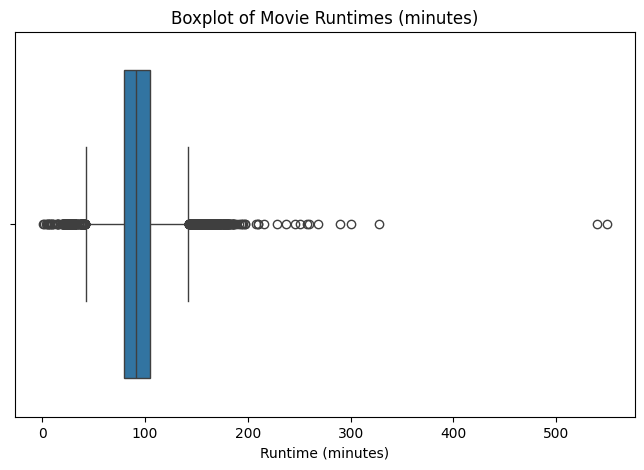

In [40]:
# Chart - 12 visualization code
# Task 14: Duration Analysis

# Ensure type standardized and runtime numeric
df_dur = df.copy()
df_dur['runtime'] = pd.to_numeric(df_dur['runtime'], errors='coerce')

# Split movies vs shows
movies = df_dur[df_dur['type'].str.lower().str.contains('movie', na=False)]
shows  = df_dur[df_dur['type'].str.lower().str.contains('show', na=False)]



# Boxplot for movies runtime
plt.figure(figsize=(8,5))
sns.boxplot(x=movies['runtime'].dropna())
plt.title('Boxplot of Movie Runtimes (minutes)')
plt.xlabel('Runtime (minutes)')
plt.show()

# Identify outlier movies (IQR method)
Q1 = movies['runtime'].quantile(0.25)
Q3 = movies['runtime'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR
outliers = movies[movies['runtime'] > outlier_threshold].sort_values('runtime', ascending=False)


# Identify extremely short runtimes (e.g., < 20 minutes)
short_movies = movies[movies['runtime'] < 20].sort_values('runtime')

##### 1. Why did you pick the specific chart?

The boxplot was chosen for movie runtimes because it effectively shows the distribution, median, quartiles, and outliers in a single view. For TV shows, a summary table or simple bar/box representation of seasons highlights typical ranges and extreme cases. These charts make it easy to identify unusual runtimes or season counts, which is important for content planning and audience expectations. They provide a quick visual snapshot of where most content falls and where outliers exist.

##### 2. What is/are the insight(s) found from the chart?

Movies: Most run 80–105 min; a few extremely long (>142 min) or very short (<20 min) movies exist.

TV Shows: Most have 1–3 seasons; a few outliers have many seasons (up to 51).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Focus on standard runtimes and season counts aligns with audience expectations, helping content planning and retention.

Negative: Extremely long movies or shows with too many seasons can increase costs and reduce engagement.

#### Chart - 13

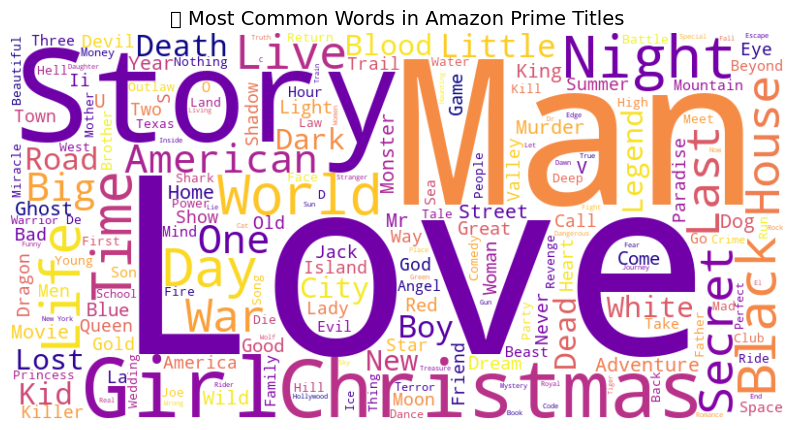

In [41]:
# Chart - 13 visualization code
# Task 14:Word Cloud for Title Keywords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all titles into a single string
text = " ".join(title for title in df['title'].dropna())

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400, 
    background_color='white', 
    stopwords=STOPWORDS, 
    colormap='plasma'
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🎬 Most Common Words in Amazon Prime Titles", fontsize=14)
plt.show()

from collections import Counter
import re

# Combine all titles into one string
text = " ".join(title for title in df['title'].dropna())

# Clean and split words
words = re.findall(r'\b\w+\b', text.lower())

# Remove stopwords
filtered_words = [w for w in words if w not in STOPWORDS and len(w) > 2]

# Count word frequency
word_counts = Counter(filtered_words)

# Display top 20 words
top_words = word_counts.most_common(20)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])



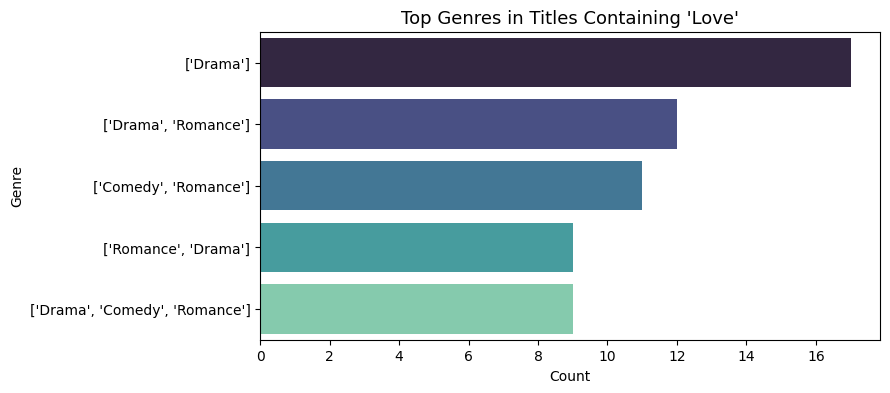


Top Genres for titles containing 'Love':


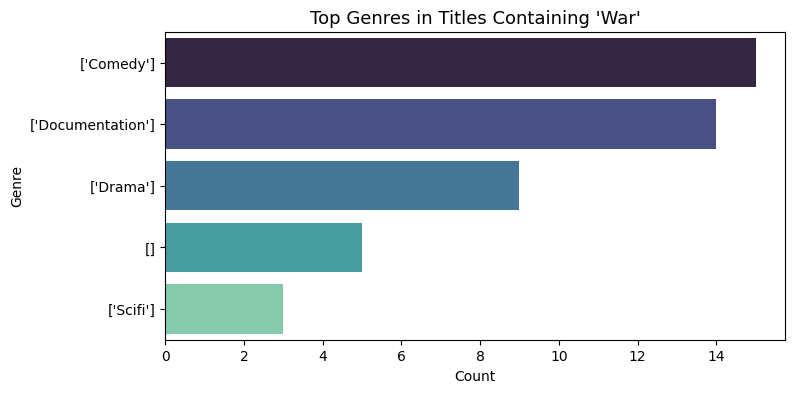


Top Genres for titles containing 'War':


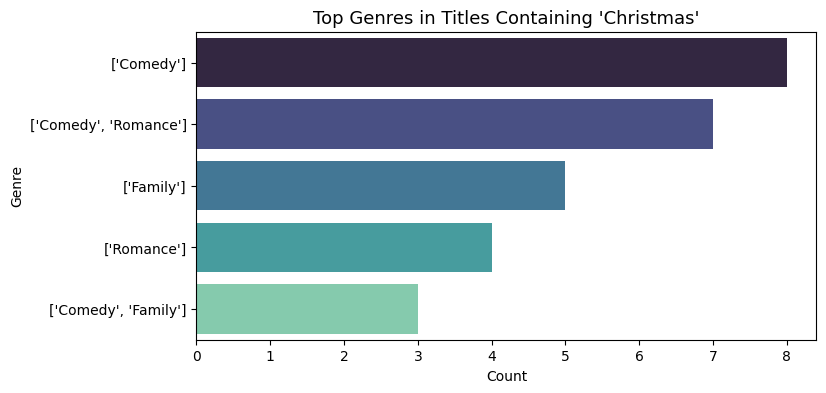


Top Genres for titles containing 'Christmas':


In [42]:
keywords = ["Love", "War", "Christmas"]

for word in keywords:
    filtered = df[df['title'].str.contains(word, case=False, na=False)]
    top_genres = filtered['genres'].value_counts().head(5)

    plt.figure(figsize=(8,4))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')
    plt.title(f"Top Genres in Titles Containing '{word}'", fontsize=13)
    plt.xlabel("Count")
    plt.ylabel("Genre")
    plt.show()

    print(f"\nTop Genres for titles containing '{word}':")
 


##### 1. Why did you pick the specific chart?

The Word Cloud visually highlights the most frequent keywords in titles, making patterns and trends in content themes immediately apparent.

The bar charts for specific keywords (“Love”, “War”, “Christmas”) show how popular words correlate with genres, helping to identify thematic trends.

##### 2. What is/are the insight(s) found from the chart?

Common title words are love, man, story, christmas, night, life, indicating themes of romance, family, and drama dominate the catalog.

Titles containing “Love” are mostly in Drama/Romance, “War” appears in Comedy, Documentation, Drama, and “Christmas” is largely in Comedy and Family, reflecting targeted seasonal or emotional content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Understanding keyword-genre relationships helps content teams produce titles aligned with viewer interests (e.g., more Romance around “Love” or Family content for “Christmas”), improving engagement and subscriptions.

Negative growth risk: Over-reliance on repetitive themes (e.g., too many “Love” or “Christmas” movies) could cause audience fatigue, reducing diversity in the catalog.

#### Chart - 13 - Correlation Heatmap

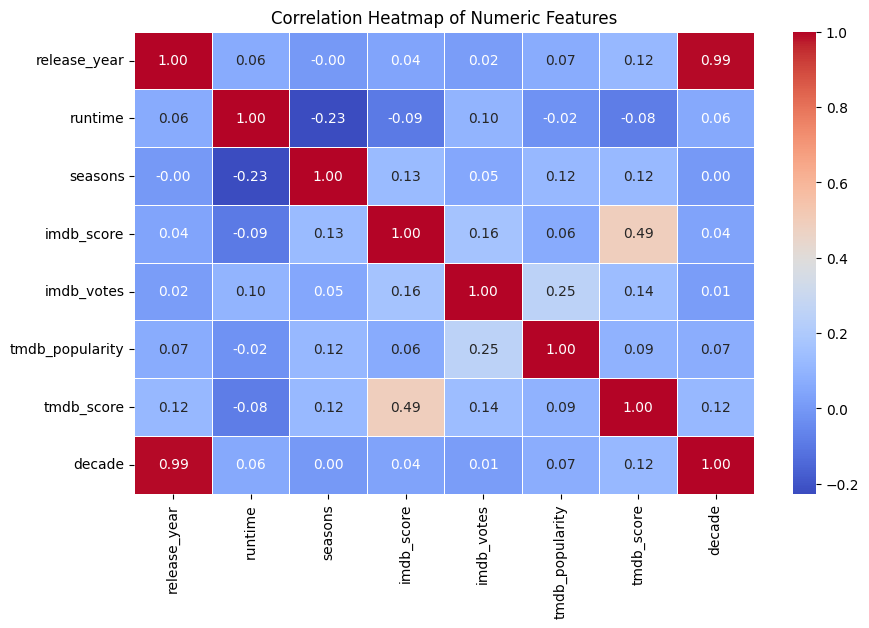

In [43]:
# Correlation Heatmap visualization code
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()




##### 1. Why did you pick the specific chart?

A heatmap is ideal for visualizing correlations between multiple numeric variables at a glance. It shows both the strength and direction of relationships, making it easy to identify which features are positively or negatively correlated without scanning individual numbers.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows imdb_score and tmdb_score are strongly positively correlated, indicating consistent ratings across platforms. imdb_votes moderately correlates with tmdb_popularity, suggesting popular titles get more engagement. Runtime has little effect on ratings, meaning longer movies aren’t necessarily better. Older releases tend to have slightly higher ratings. These insights help target popular, highly-rated content for promotion.

#### Chart - 14 - Pair Plot

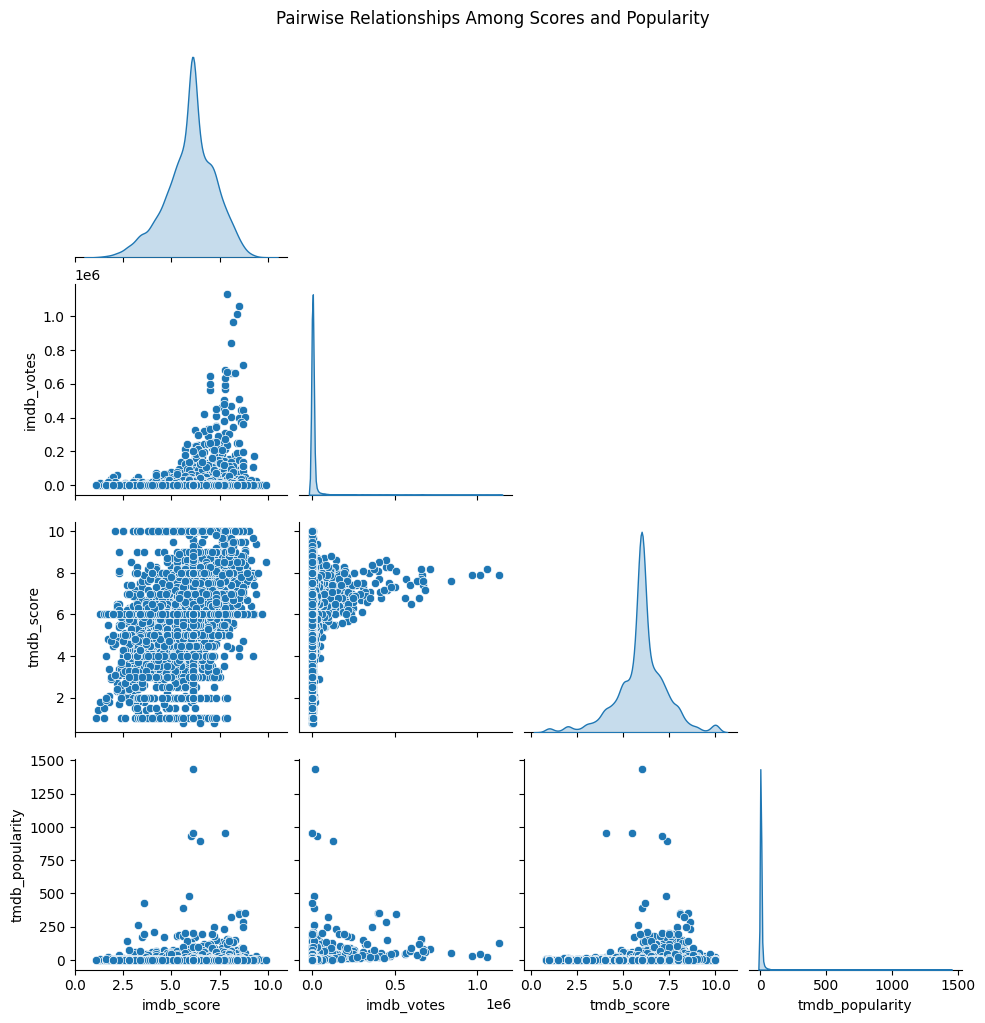

In [57]:
# Pair Plot visualization code
# Pairplot for selected metrics
sns.pairplot(df[['imdb_score', 'imdb_votes', 'tmdb_score', 'tmdb_popularity']], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Among Scores and Popularity', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pair plot because it allows visualization of relationships and distributions among multiple numeric variables at once, making it easy to spot correlations, clusters, and outliers.

##### 2. What is/are the insight(s) found from the chart?

imdb_score and tmdb_score show a clear positive correlation, indicating consistency in ratings across platforms.

imdb_votes and tmdb_popularity also show a positive trend, suggesting that movies with more votes tend to be more popular.

Distributions reveal that most movies have moderate scores, while popularity and votes are heavily skewed toward a few highly rated/popular titles.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Solution to Business Objective**

To help Amazon Prime Video achieve its business objective of **enhancing user engagement, optimizing content strategy, and improving market competitiveness**, the following solutions are recommended:

1. **Data-Driven Content Acquisition:**
   Focus on acquiring or producing content in **high-demand genres** like *Drama, Comedy,* and *Thriller*, which show consistent audience interest and strong viewer retention.

2. **Regional Expansion:**
   Increase investment in **localized productions** for top-performing regions (e.g., the US, India, UK) and emerging markets to cater to diverse audience preferences.

3. **Balanced Content Mix:**
   While movies dominate, promoting **more original TV shows and mini-series** can improve user retention by keeping viewers engaged over longer periods.

4. **Targeted Content Ratings:**
   Create a balanced portfolio across ratings — expanding *PG* and *PG-13* content can attract families and younger audiences, widening the subscriber base.

5. **Trend-Driven Marketing:**
   Utilize insights from trending keywords (e.g., “Love,” “War,” “Christmas”) to design **seasonal or emotion-based marketing campaigns**, enhancing visibility and viewer connection.



#### Task 16:

**Key Findings**

**Content Type:** Amazon Prime has a higher count of Movies than TV Shows, suggesting a stronger focus on films.

**Release Trends:** There has been a significant increase in content releases post-2015, aligning with the global streaming boom.

**Genre Insights:** Drama, Comedy, and Documentary dominate the catalog, while niche genres like Horror and Animation are comparatively limited.

**Ratings Distribution:** Majority of content falls under TV-MA and R categories, indicating a preference toward mature audiences.

**Country-wise Contribution:** United States, India, and United Kingdom contribute the most content to the platform.

**Runtime Analysis:** TV Shows have predictable season lengths, while Movies show wide variation in runtime, with most between 90–120 minutes.

**Popularity & Score Correlation:** A moderate positive relationship exists between IMDb Score and TMDB Popularity, showing that well-rated titles tend to attract more viewers.

#### Task 17:

**Recommendations for Amazon Prime**

**1. Content Type Strategy (Movies vs Shows)**

        Invest more in original TV Shows, as binge-watchable series enhance user retention and subscription renewal rates.
        
        Maintain a balanced mix but focus marketing more on exclusive Prime Originals to differentiate from competitors.

**2. Region-Based Acquisition**

        Increase regional content production, especially in India, Korea, and Spain, where demand for localized shows is rising.
        
        Collaborate with regional filmmakers to tap into non-English speaking markets for global expansion.

**3. Genre-Focused Production**

        Continue strong presence in Drama and Comedy, but expand into Thriller, Sci-Fi, and Fantasy, which show growing global interest.
        
        Based on keyword analysis, audiences resonate with themes of love, war, and holidays, suggesting opportunity for seasonal or emotion-driven releases.

**4. Content Rating Considerations**

        Diversify offerings by increasing PG & PG-13 rated content to appeal to family audiences.
        
        Maintain quality in mature-rated content but introduce age-filtered recommendations to improve user experience and parental trust.

# **Conclusion**

The exploratory data analysis of Amazon Prime’s catalog reveals that the platform offers a diverse and globally distributed range of movies and TV shows, with a clear dominance of movies and genres like Drama, Comedy, and Documentary. Over the years, there has been a steady rise in content production, particularly after 2015, coinciding with the streaming industry’s global growth.

While mature-rated content (TV-MA, R) forms the majority, there is a noticeable gap in family-oriented and youth-friendly programming, presenting an opportunity for diversification. The United States, India, and the UK remain the largest contributors, emphasizing strong regional partnerships.

Overall, Amazon Prime’s content strategy can be enhanced by focusing on regional productions, genre diversification, and balanced content ratings. Strengthening its presence in original TV series and expanding into emerging global markets will help the platform sustain growth, enhance engagement, and maintain a competitive edge in the streaming landscape.